# Predicting Loan Status

This project was completed as part of Lighthouse Labs' Data Science Bootcamp. 

## Introduction

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('datasets/data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Exploration

In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Numerical Variables

In [7]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

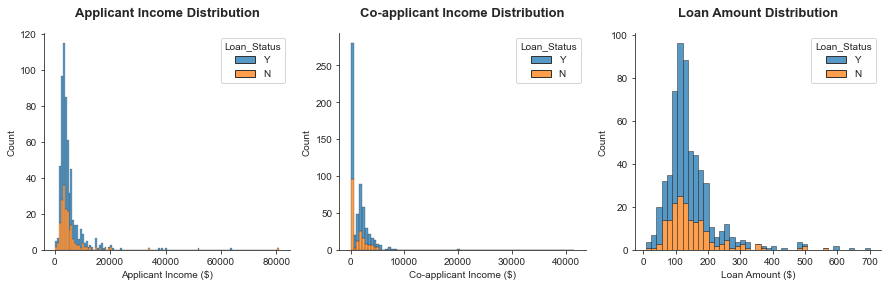

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.set_style('ticks')
sns.histplot(data=df, x='ApplicantIncome', ax=ax[0], edgecolor='.2', hue='Loan_Status', multiple='stack')
ax[0].set(xlabel='Applicant Income ($)')
ax[0].set_title('Applicant Income Distribution', fontsize=13, fontweight='bold', y=1.05)

sns.histplot(data=df, x='CoapplicantIncome', ax=ax[1], edgecolor='.2', hue='Loan_Status', multiple='stack')
ax[1].set(xlabel='Co-applicant Income ($)')
ax[1].set_title('Co-applicant Income Distribution', fontsize=13, fontweight='bold', y=1.05)

sns.histplot(data=df, x='LoanAmount', ax=ax[2], edgecolor='.2', hue='Loan_Status', multiple='stack')
ax[2].set(xlabel='Loan Amount ($)')
ax[2].set_title('Loan Amount Distribution', fontsize=13, fontweight='bold', y=1.05)

sns.despine()
plt.show()

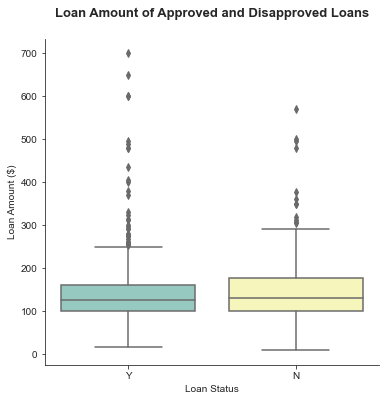

In [47]:
fig, ax = plt.subplots(figsize=(6,6))

sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='Set3')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.title('Loan Amount of Approved and Disapproved Loans', fontsize=13, fontweight='bold', y=1.05)

sns.despine()
plt.show()


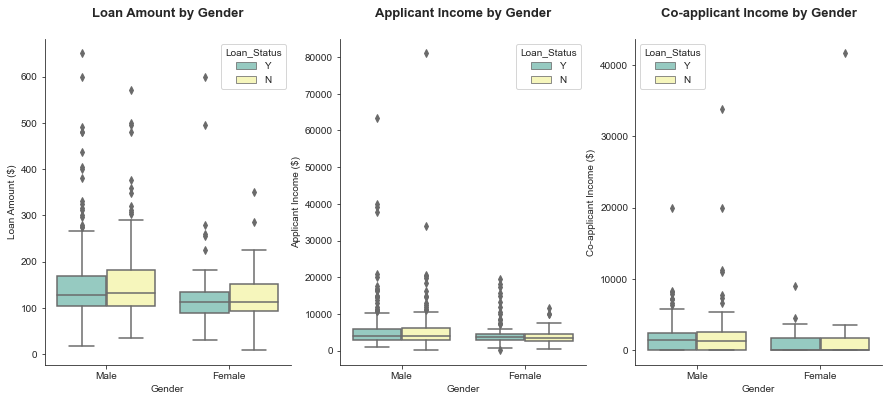

In [53]:
# By Gender
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

sns.boxplot(x='Gender', y='LoanAmount', data=df, ax=ax[0], palette='Set3', hue='Loan_Status')
ax[0].set(xlabel='Gender', ylabel='Loan Amount ($)')
ax[0].set_title('Loan Amount by Gender', fontsize=13, fontweight='bold', y=1.05)

sns.boxplot(x='Gender', y='ApplicantIncome', data=df, ax=ax[1], palette='Set3', hue='Loan_Status')
ax[1].set(xlabel='Gender', ylabel='Applicant Income ($)')
ax[1].set_title('Applicant Income by Gender', fontsize=13, fontweight='bold', y=1.05)

sns.boxplot(x='Gender', y='CoapplicantIncome', data=df, ax=ax[2], palette='Set3', hue='Loan_Status')
ax[2].set(xlabel='Gender', ylabel='Co-applicant Income ($)')
ax[2].set_title('Co-applicant Income by Gender', fontsize=13, fontweight='bold', y=1.05)

sns.despine()
plt.show()

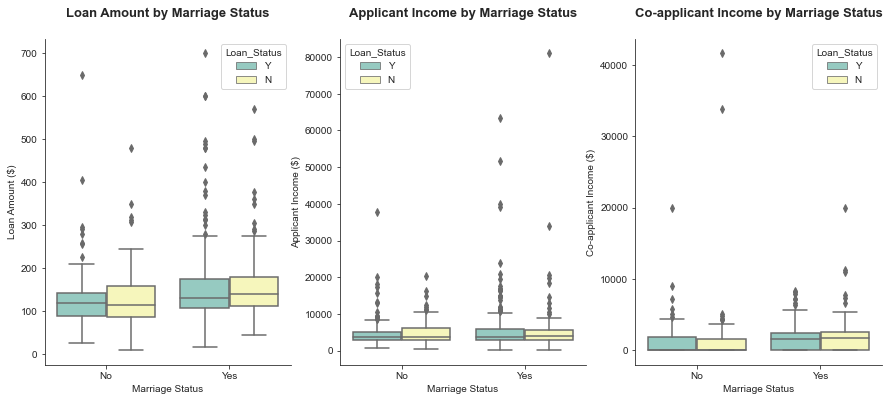

In [55]:
#By Marriage Status

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

sns.boxplot(x='Married', y='LoanAmount', data=df, ax=ax[0], palette='Set3', hue='Loan_Status')
ax[0].set(xlabel='Marriage Status', ylabel='Loan Amount ($)')
ax[0].set_title('Loan Amount by Marriage Status', fontsize=13, fontweight='bold', y=1.05)

sns.boxplot(x='Married', y='ApplicantIncome', data=df, ax=ax[1], palette='Set3', hue='Loan_Status')
ax[1].set(xlabel='Marriage Status', ylabel='Applicant Income ($)')
ax[1].set_title('Applicant Income by Marriage Status', fontsize=13, fontweight='bold', y=1.05)

sns.boxplot(x='Married', y='CoapplicantIncome', data=df, ax=ax[2], palette='Set3', hue='Loan_Status')
ax[2].set(xlabel='Marriage Status', ylabel='Co-applicant Income ($)')
ax[2].set_title('Co-applicant Income by Marriage Status', fontsize=13, fontweight='bold', y=1.05)

sns.despine()
plt.show()

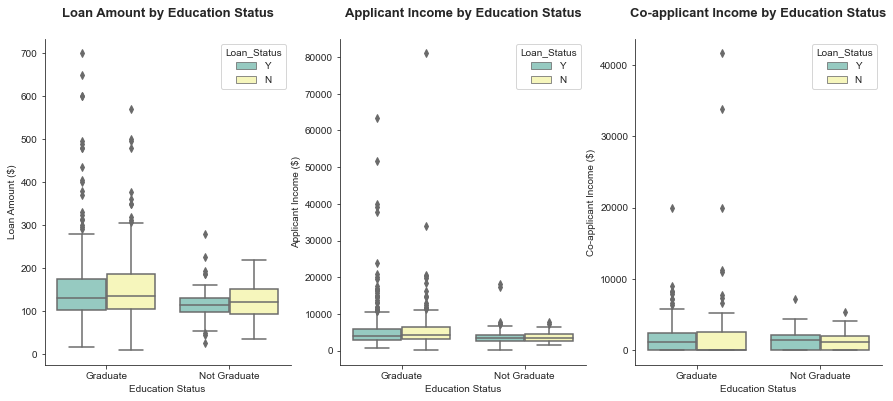

In [57]:
#By Education

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

sns.boxplot(x='Education', y='LoanAmount', data=df, ax=ax[0], palette='Set3', hue='Loan_Status')
ax[0].set(xlabel='Education Status', ylabel='Loan Amount ($)')
ax[0].set_title('Loan Amount by Education Status', fontsize=13, fontweight='bold', y=1.05)

sns.boxplot(x='Education', y='ApplicantIncome', data=df, ax=ax[1], palette='Set3', hue='Loan_Status')
ax[1].set(xlabel='Education Status', ylabel='Applicant Income ($)')
ax[1].set_title('Applicant Income by Education Status', fontsize=13, fontweight='bold', y=1.05)

sns.boxplot(x='Education', y='CoapplicantIncome', data=df, ax=ax[2], palette='Set3', hue='Loan_Status')
ax[2].set(xlabel='Education Status', ylabel='Co-applicant Income ($)')
ax[2].set_title('Co-applicant Income by Education Status', fontsize=13, fontweight='bold', y=1.05)

sns.despine()
plt.show()

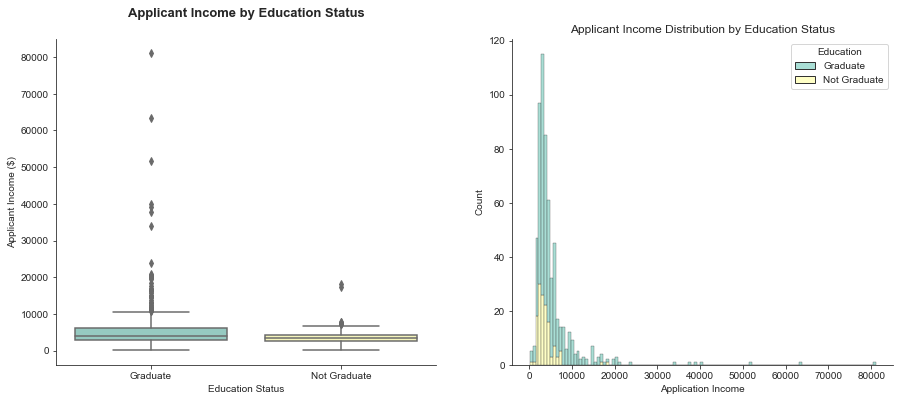

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.boxplot(x='Education', y='ApplicantIncome', data=df, palette='Set3', ax=ax[0])
ax[0].set(xlabel='Education Status', ylabel='Applicant Income ($)')
ax[0].set_title('Applicant Income by Education Status', fontsize=13, fontweight='bold', y=1.05)

sns.histplot(data=df, x='ApplicantIncome', palette='Set3', edgecolor='.2', hue='Education', multiple='stack', ax=ax[1])
ax[1].set(xlabel='Application Income')
ax[1].set_title('Applicant Income Distribution by Education Status')
sns.despine()
plt.show()

### Categorical Variables

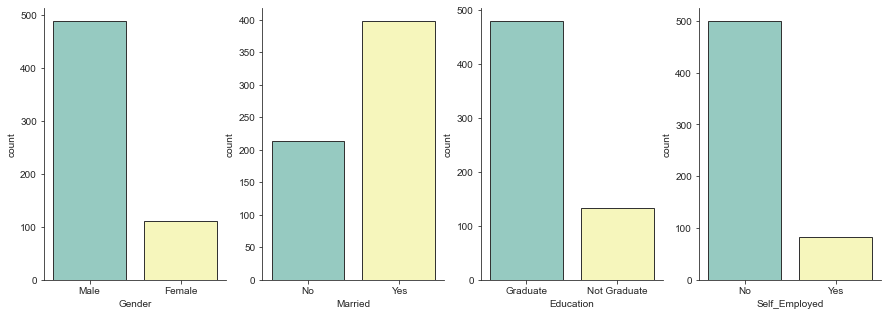

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5))

sns.countplot(x='Gender', data=df, ax=ax[0], edgecolor='.2', palette='Set3')
sns.countplot(x='Married', data=df, ax=ax[1], edgecolor='.2', palette='Set3')
sns.countplot(x='Education', data=df, ax=ax[2], edgecolor='.2', palette='Set3')
sns.countplot(x='Self_Employed', data=df, ax=ax[3], edgecolor='.2', palette='Set3')
sns.despine()
plt.show()

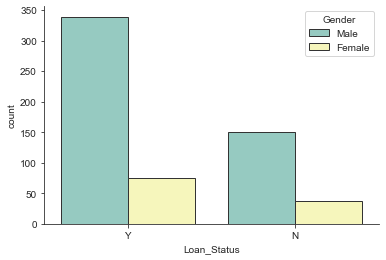

In [69]:
sns.countplot(x='Loan_Status', data=df, hue='Gender', palette='Set3', edgecolor='.2')
sns.despine()
plt.show()

## Data Cleaning and Transformation

In [252]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, f1_score, precision_score, recall_score

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB

In [227]:
df_transformed = df.copy()
df_transformed.drop('Loan_ID', axis=1, inplace=True)
df_transformed.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [228]:
df_transformed.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [229]:
y = df_transformed['Loan_Status']
X = df_transformed.drop('Loan_Status', axis=1)

In [230]:
label = LabelEncoder()
y = label.fit_transform(y)

In [231]:
X['total_income'] = X['ApplicantIncome'] + X['CoapplicantIncome']
X.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [232]:
X['total_income'] = np.log10(X['total_income'])
X['LoanAmount'] = np.log10(X['LoanAmount'])

In [233]:
num_features = ['Loan_Amount_Term', 'total_income', 'LoanAmount']
cat_features = X.drop(num_feats, axis=1).columns.tolist()

In [234]:
#Simple Imputers
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

In [235]:
#One Hot Encoder
ohe = OneHotEncoder(sparse=False)

In [236]:
#Standard Scaler
scaler = StandardScaler()

In [237]:
#Models
logistic = LogisticRegression()

In [238]:
numerical_preprocessing = Pipeline([('impute_median', num_imputer), ('scale', scaler)])
categorical_preprocessing = Pipeline([('impute_common', cat_imputer), ('ohe', ohe)])

In [239]:
preprocessing = ColumnTransformer([('num_preprocess', numerical_preprocessing, num_features),
                                   ('cat_preprocess', categorical_preprocessing, cat_features)])

In [240]:
pipeline = Pipeline([('preprocess', preprocessing), ('model', logistic)])

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y)

In [242]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_preprocess',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term',
                                                   'total_income',
                                                   'LoanAmount']),
                                                 ('cat_preprocess',
                                                  Pipeline(steps=[('impute_common',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
           

In [243]:
pipeline.score(X_test, y_test)

0.7987012987012987

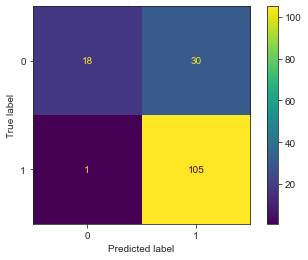

In [244]:
plot_confusion_matrix(pipeline, X_test, y_test)

In [251]:
y_pred = pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('F1 Score:', f1)
print('Precision Score:', precision)
print('Recall Score:', recall)

F1 Score: 0.8713692946058091
Precision Score: 0.7777777777777778
Recall Score: 0.9905660377358491


In [254]:
param_grid = {'model': [LogisticRegression(), RandomForestClassifier(), 
                        GradientBoostingClassifier(), KNeighborsClassifier(),
                       CategoricalNB()]}

In [256]:
search = GridSearchCV(pipeline, param_grid, cv=5)

In [261]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_preprocess',
                                                                         Pipeline(steps=[('impute_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Loan_Amount_Term',
                                                                          'total_income',
                                                                          'LoanAmount']),
                                                                        ('cat_preprocess',
                             

In [269]:
import pickle
pickle.dump(search, open("testmodel.p", "wb"))

In [273]:
search.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [274]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
158,Male,No,0,Graduate,NaN,2.079181,360.0,1.0,Rural,3.704408
425,Male,Yes,0,Graduate,No,2.082785,360.0,1.0,Rural,3.842983
315,Male,Yes,1,Not Graduate,No,2.045323,180.0,1.0,Urban,3.702344
296,Male,Yes,1,Graduate,No,2.301030,360.0,1.0,Semiurban,3.837273
370,Female,No,0,Graduate,Yes,1.740363,360.0,1.0,Semiurban,4.197529
...,...,...,...,...,...,...,...,...,...,...
224,Male,Yes,0,Graduate,No,2.107210,360.0,1.0,Semiurban,3.795880
121,Female,No,0,Graduate,No,1.643453,360.0,1.0,Semiurban,3.619719
86,Male,Yes,2,Not Graduate,No,1.995635,360.0,NaN,Semiurban,3.726972
106,Male,Yes,2,Graduate,No,2.352183,360.0,1.0,Urban,4.098401


In [275]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'total_income'],
      dtype='object')